<a href="https://colab.research.google.com/github/marcosPaolucci/MachineLearning/blob/main/CheckPoint1ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#df = pd.read_csv("/content/aluguel.csv")
df = pd.read_csv("/content/aluguel.csv", sep=";")


In [ ]:
df.head()

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


In [ ]:
df.describe()

,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
count,10685.000000,10685.00000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000
mean,149.155452,2.50613,2.235751,1.608797,5.043332,0.777913,0.243706,918.745905,3890.416004,335.563032,53.218811,5198.132616
std,537.159483,1.17086,1.406287,1.588426,5.358497,0.415669,0.429338,1166.977706,3381.827918,677.795945,47.350550,4473.376271
min,11.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,56.000000,2.00000,1.000000,0.000000,1.000000,1.000000,0.000000,170.000000,1530.000000,38.000000,21.000000,2061.000000
50%,90.000000,2.00000,2.000000,1.000000,3.000000,1.000000,0.000000,560.000000,2650.000000,125.000000,36.000000,3578.000000
75%,182.000000,3.00000,3.000000,2.000000,8.000000,1.000000,0.000000,1235.000000,5000.000000,375.000000,68.000000,6758.000000
max,46335.000000,13.00000,10.000000,12.000000,51.000000,1.000000,1.000000,32000.000000,30000.000000,28120.000000,451.000000,32750.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10685 entries, 0 to 10684
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cidade            10685 non-null  object
 1   area              10685 non-null  int64 
 2   quartos           10685 non-null  int64 
 3   banheiros         10685 non-null  int64 
 4   vagas_garagem     10685 non-null  int64 
 5   andar             10685 non-null  int64 
 6   aceita_animal     10685 non-null  int64 
 7   mobiliaria        10685 non-null  int64 
 8   valor_condominio  10685 non-null  int64 
 9   valor_aluguel     10685 non-null  int64 
 10  valor_iptu        10685 non-null  int64 
 11  valor_seguro      10685 non-null  int64 
 12  valor_total       10685 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


In [ ]:
# instalando biblioteca de visualização

!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 21.9 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
eda = sv.analyze(source = df, target_feat = 'valor_total')

                                             |          | [  0%]   00:00 -> (? left)


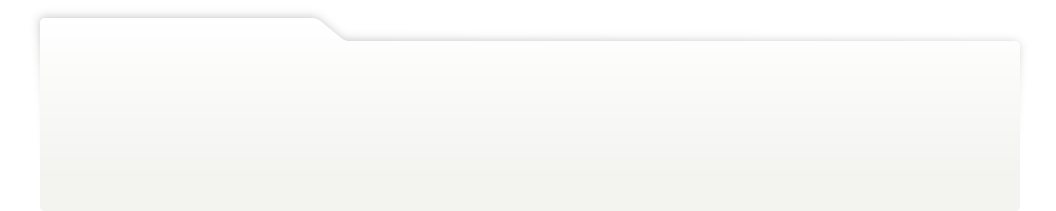
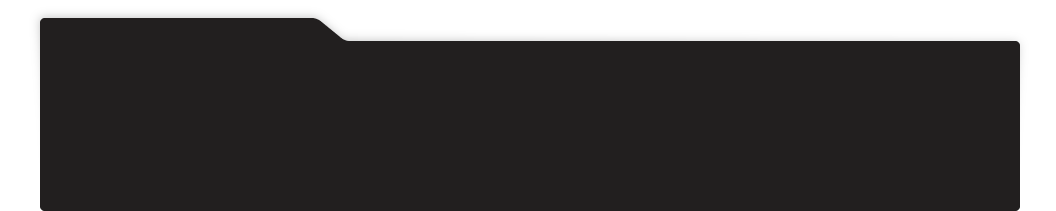
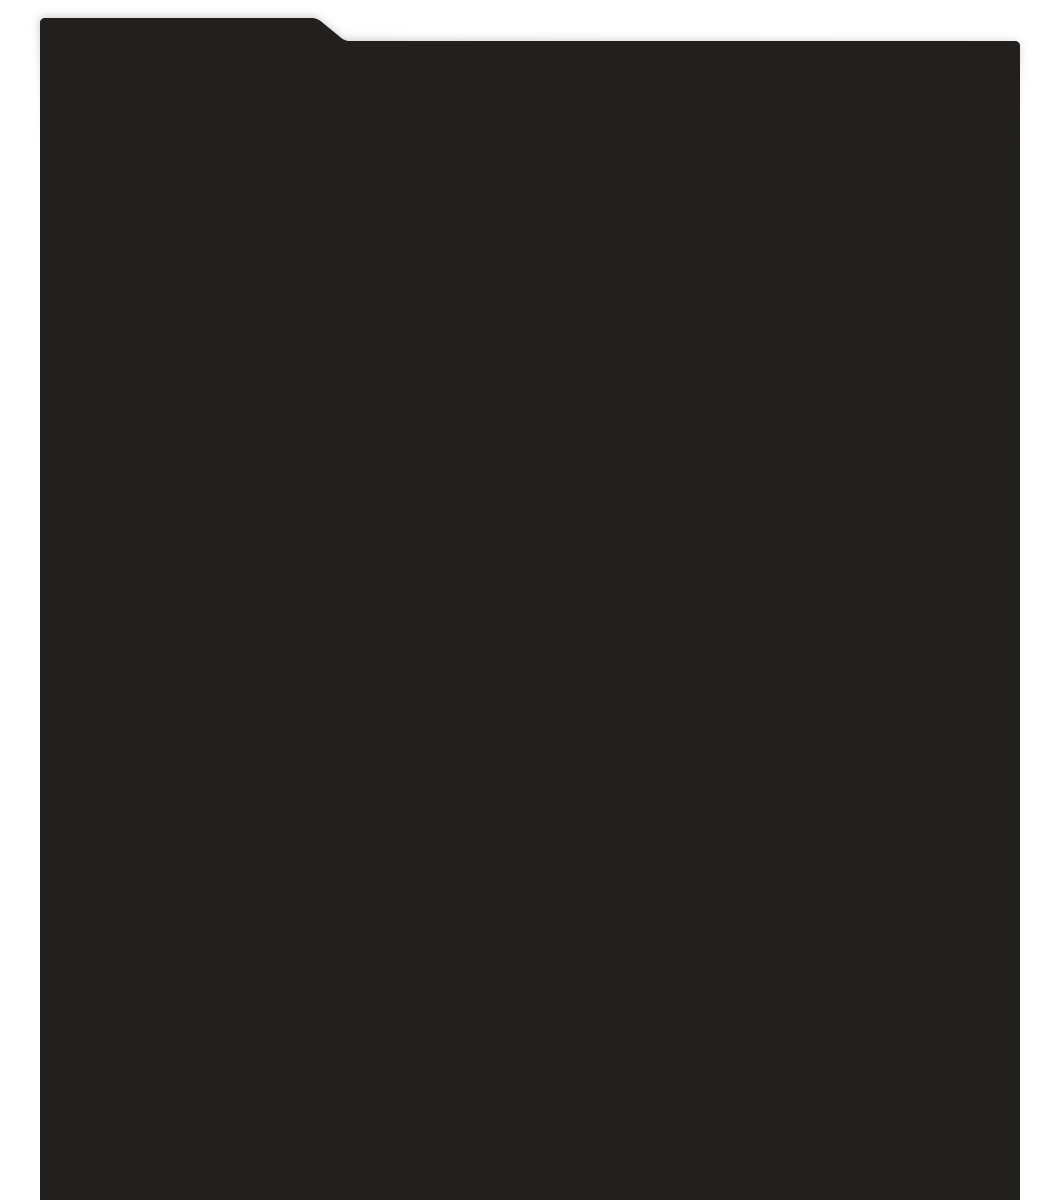
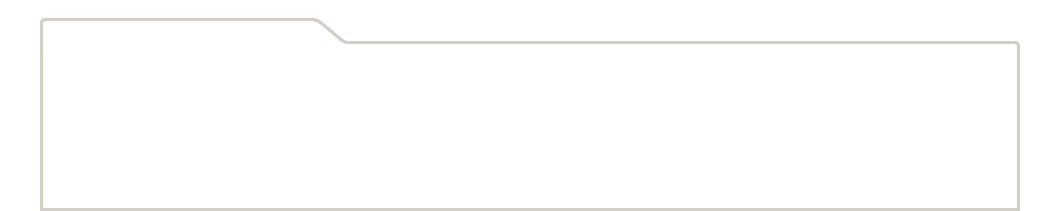
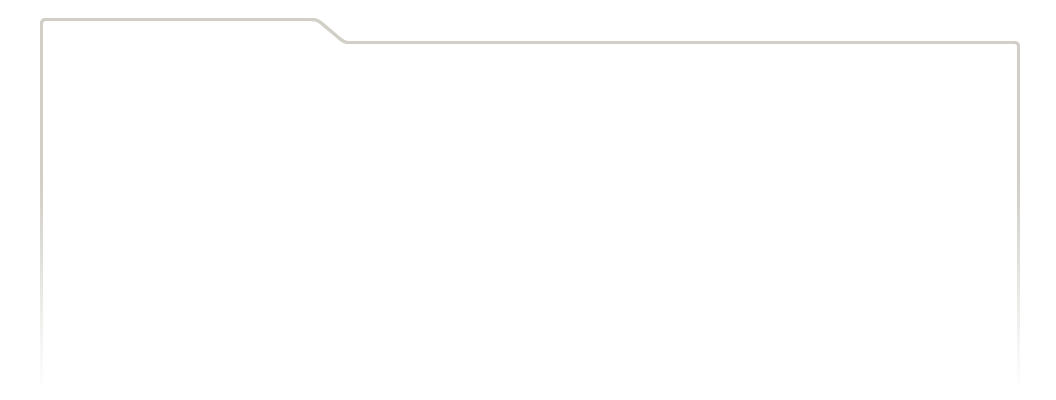
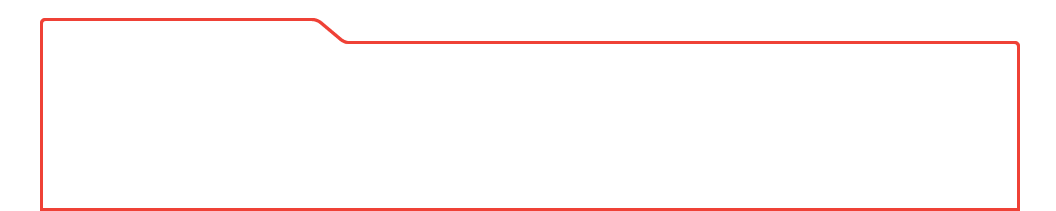
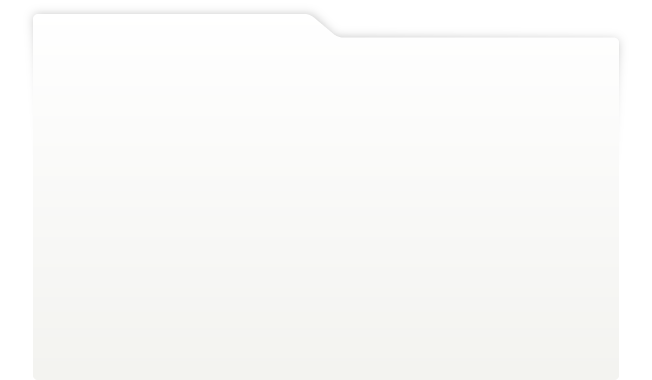
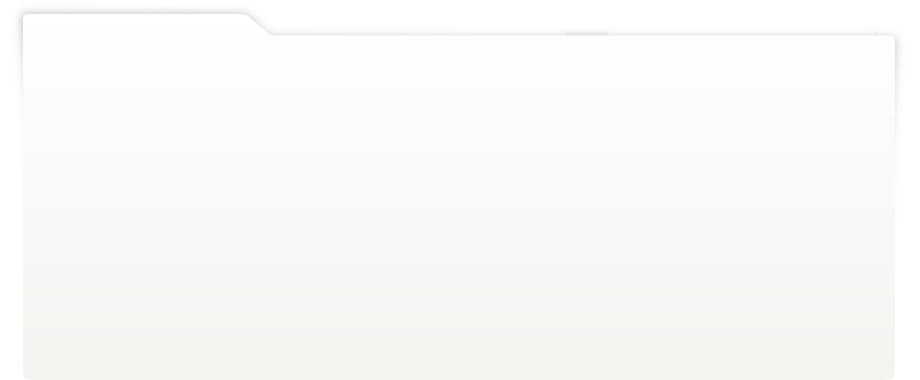
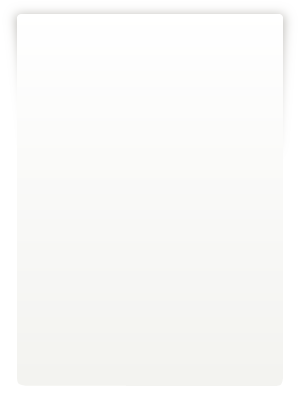
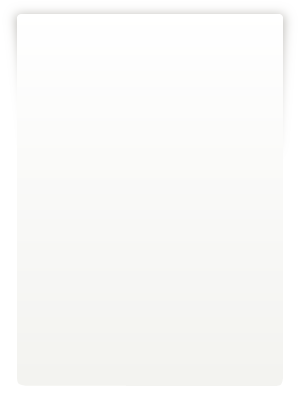
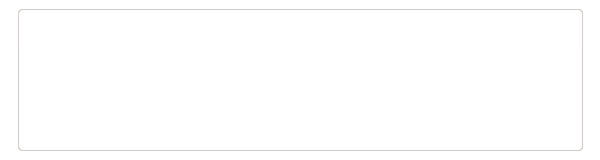
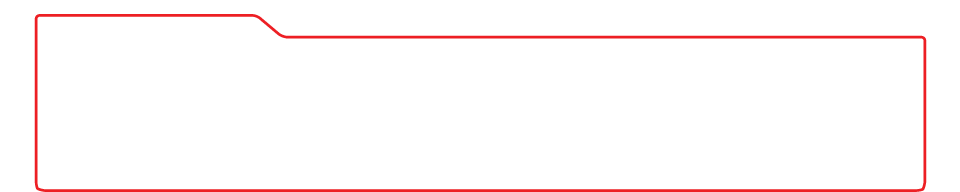
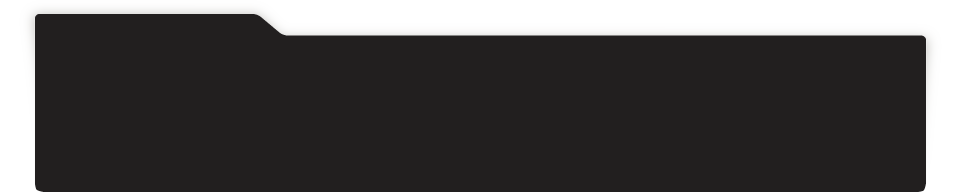
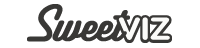
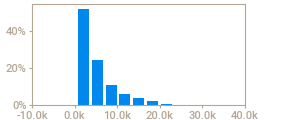
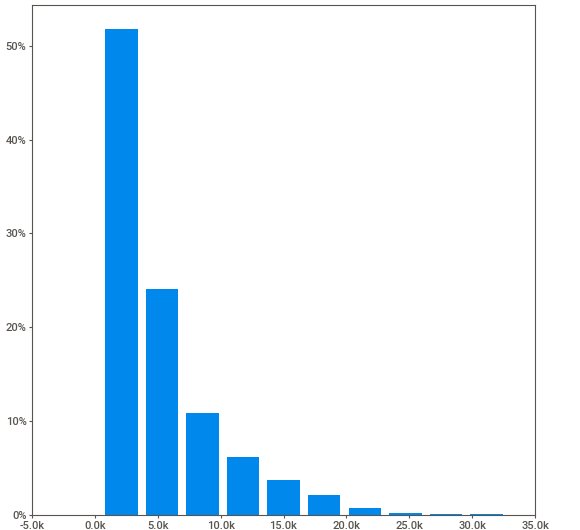
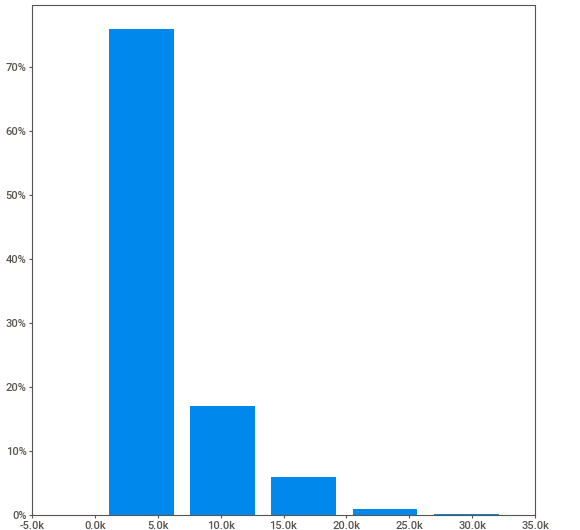
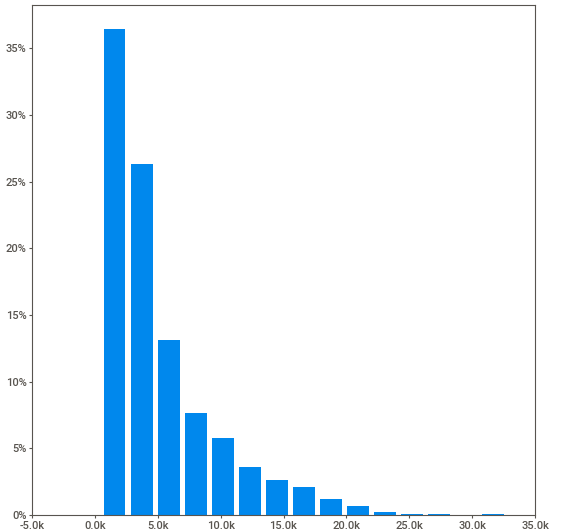
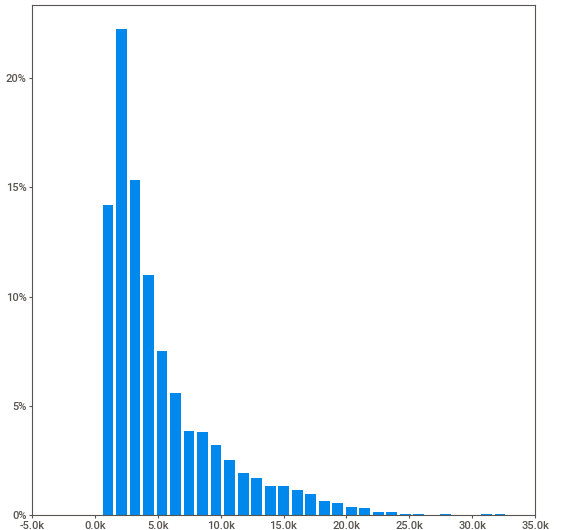
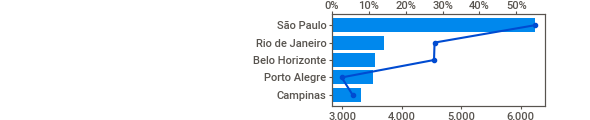
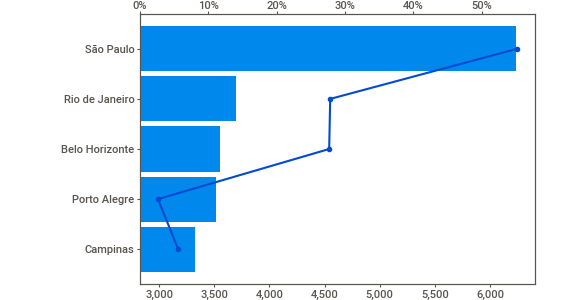
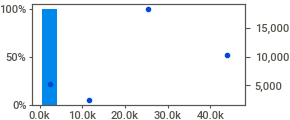
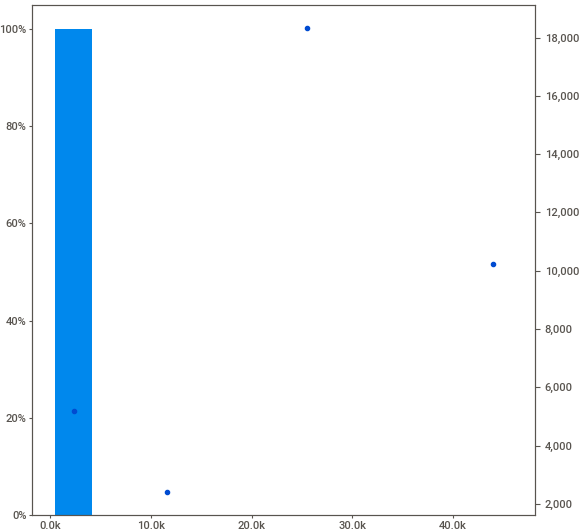
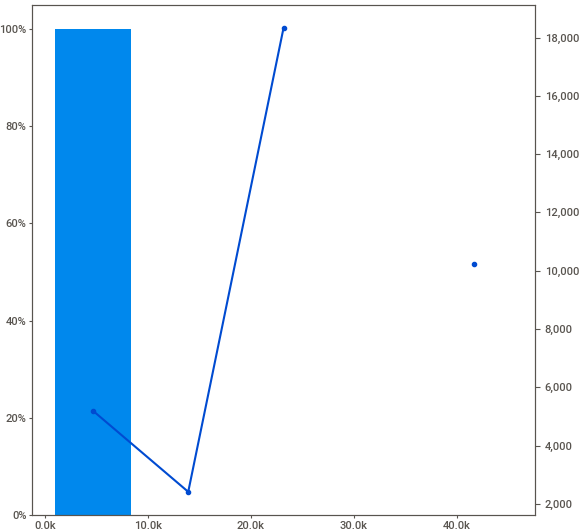
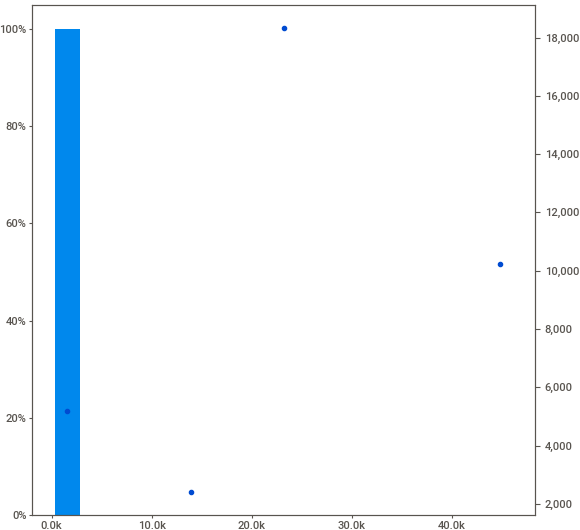
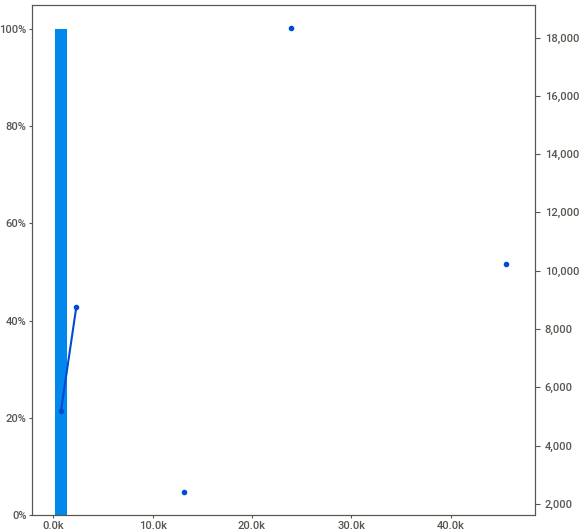
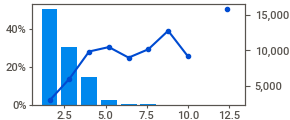
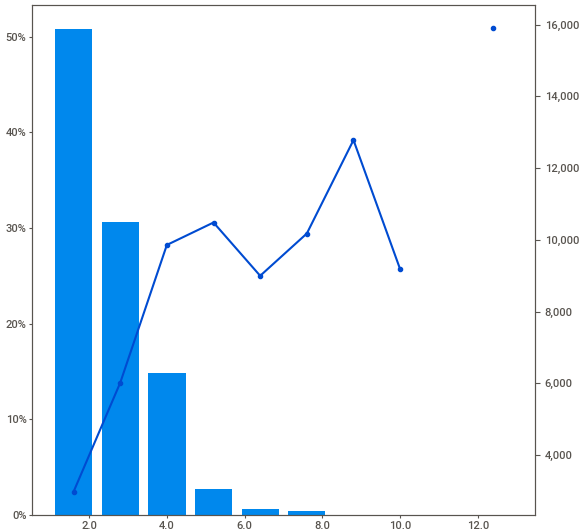
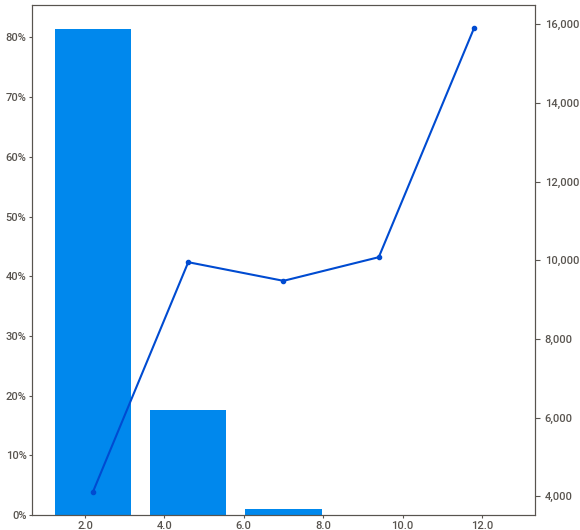
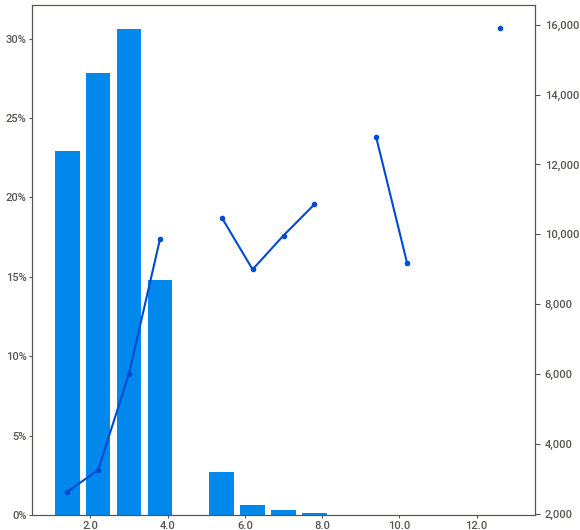
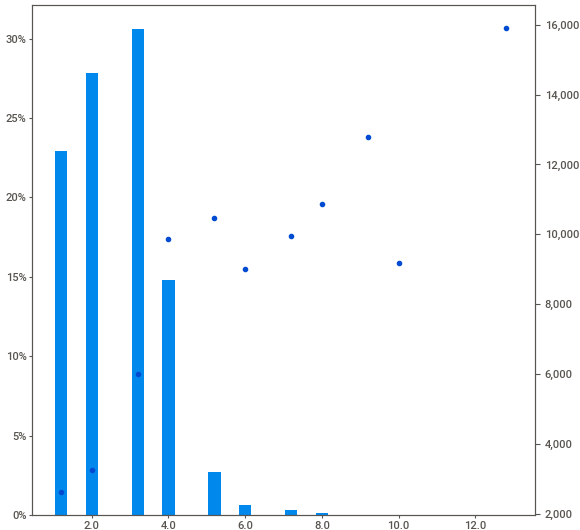
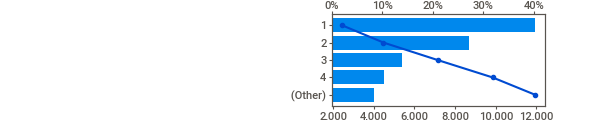
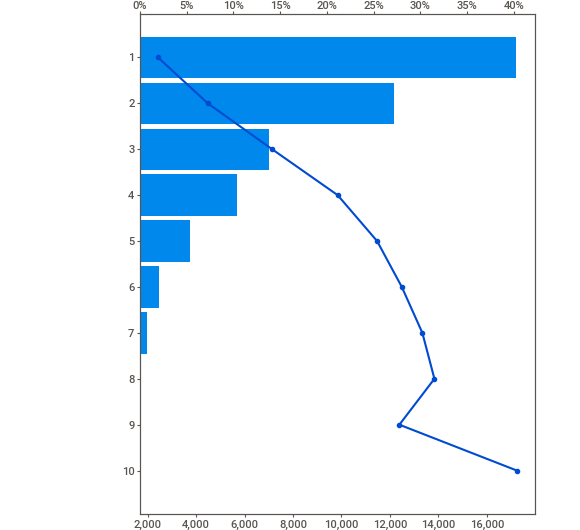
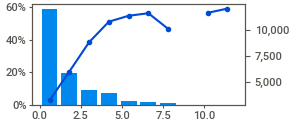
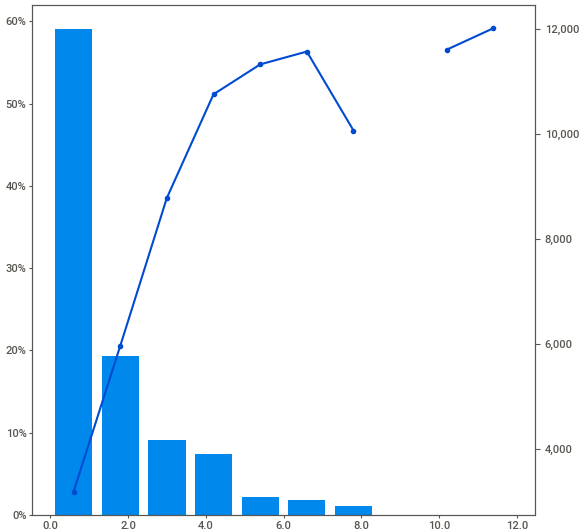
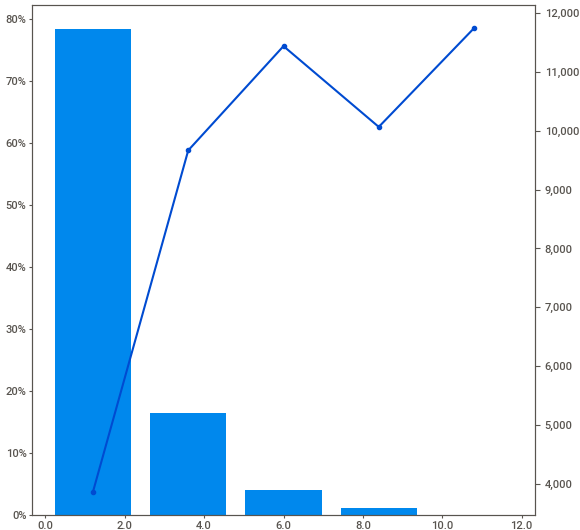
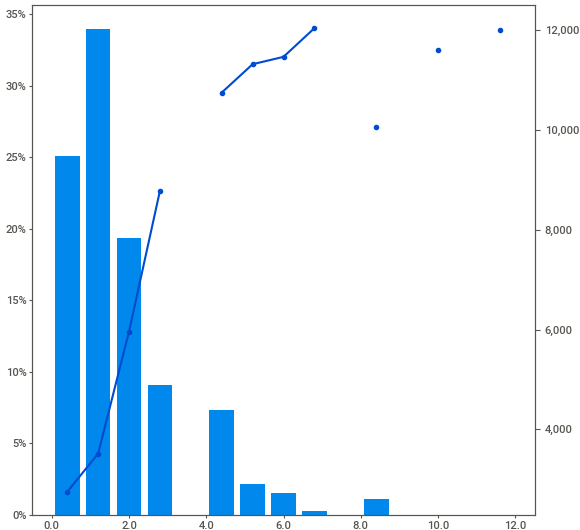
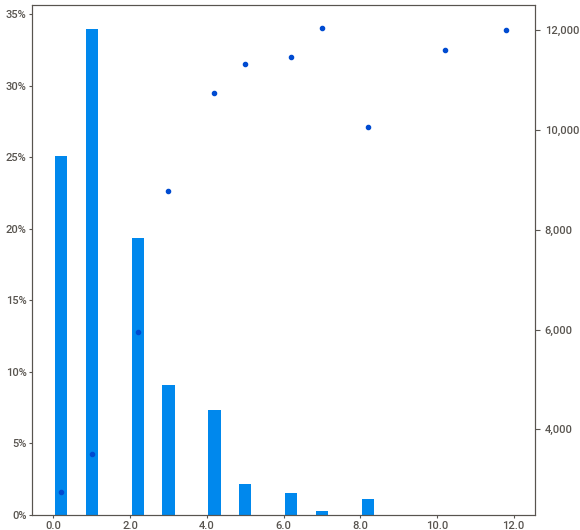
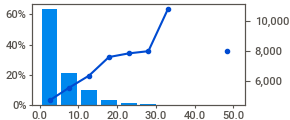
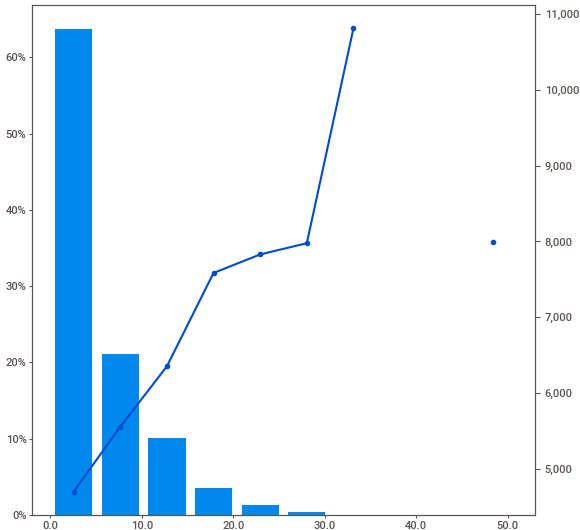
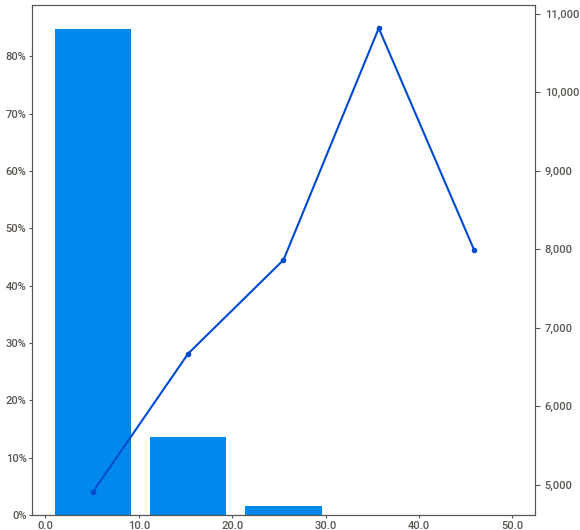
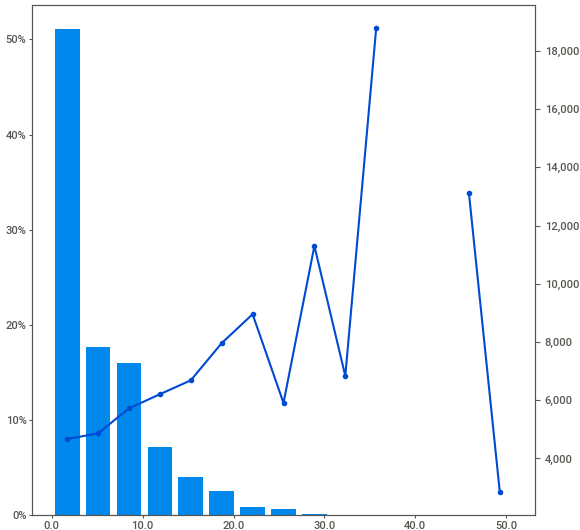
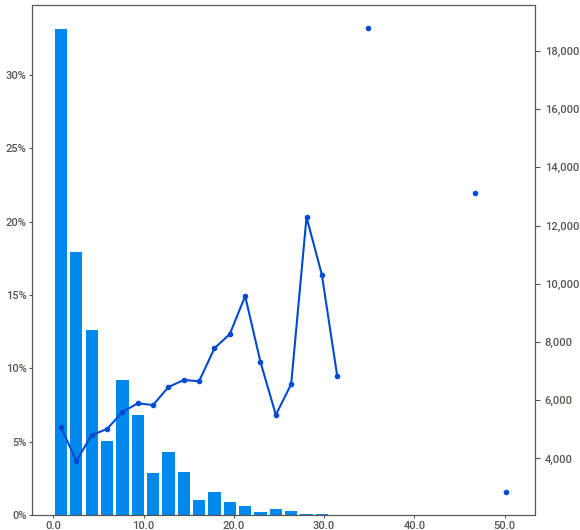
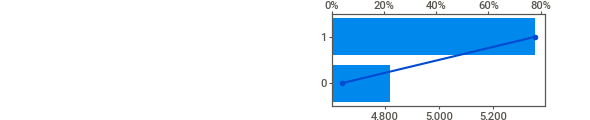
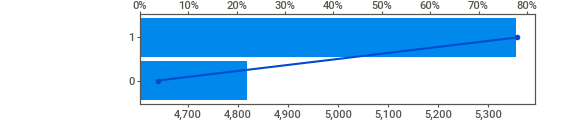
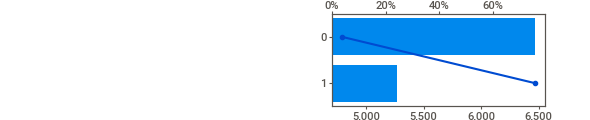
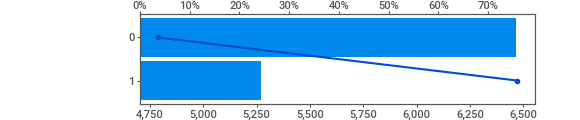
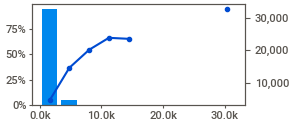
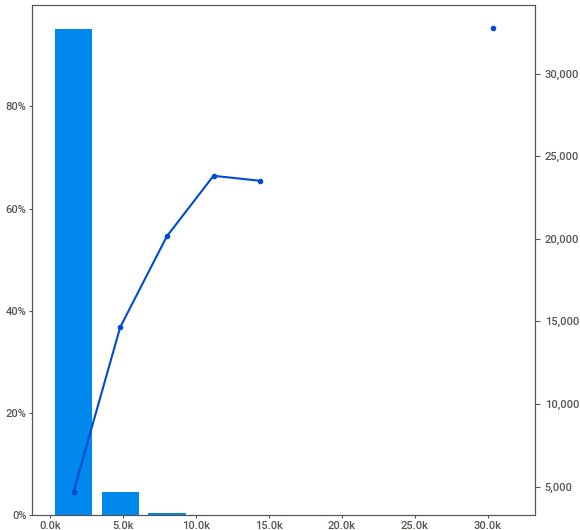
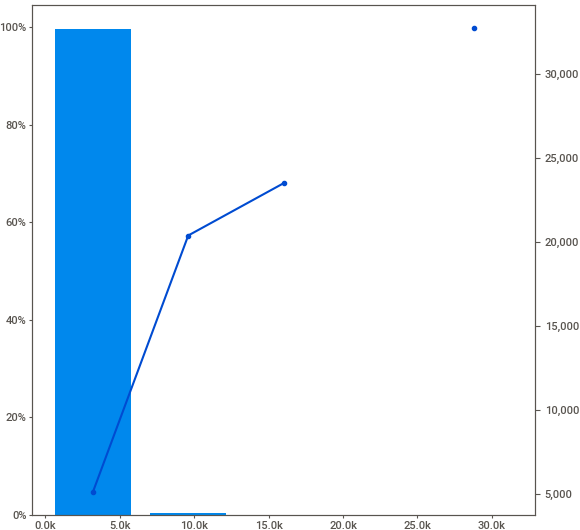
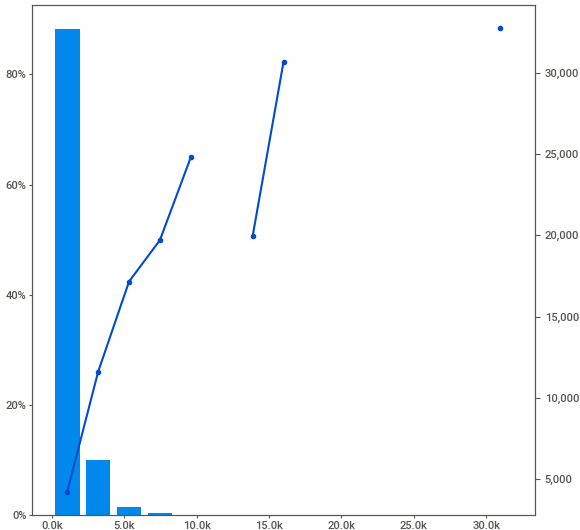
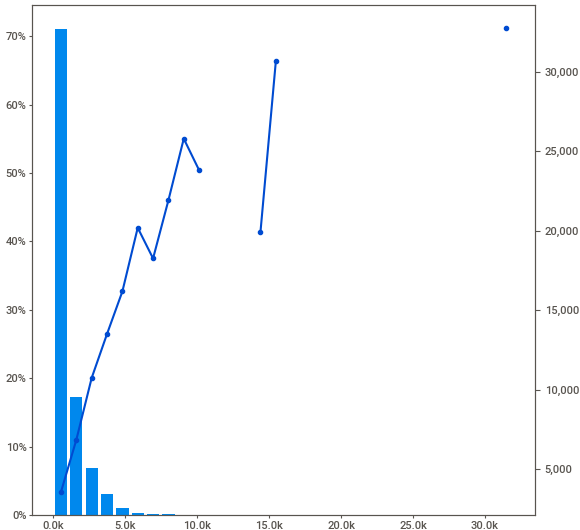
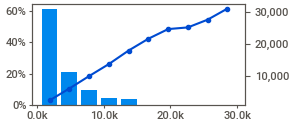
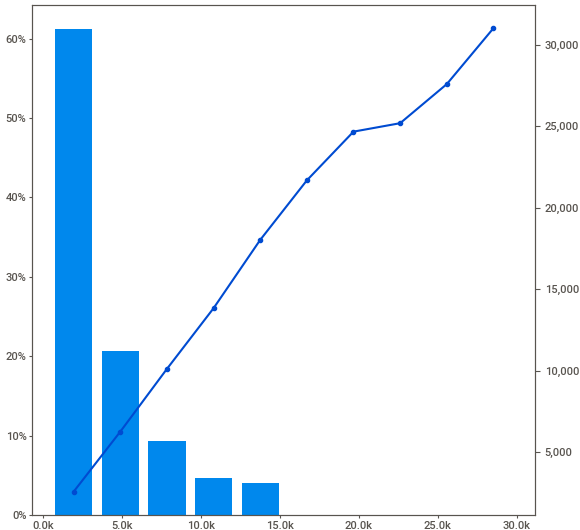
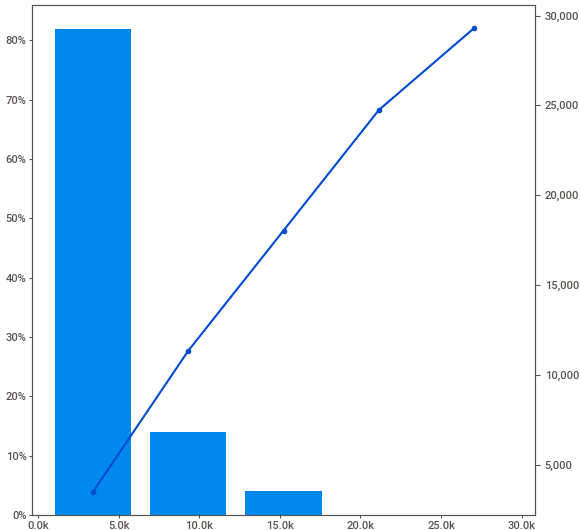
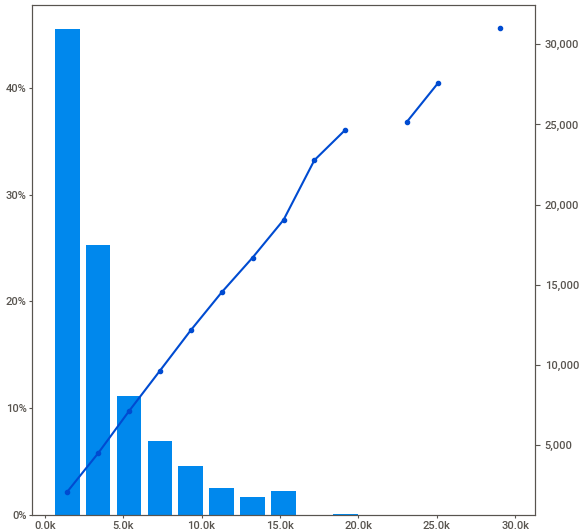
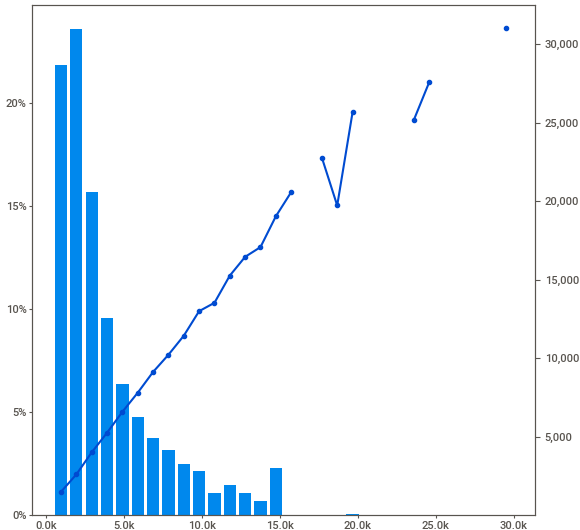
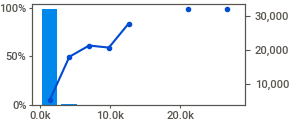
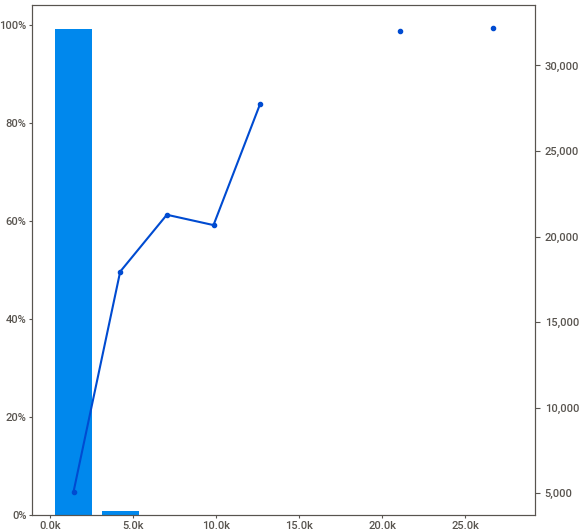
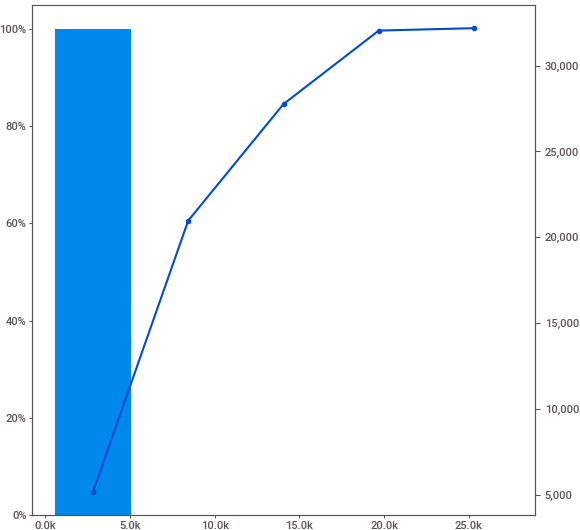
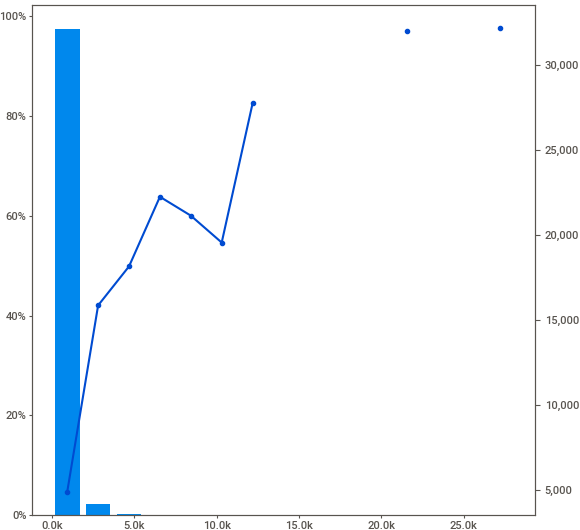
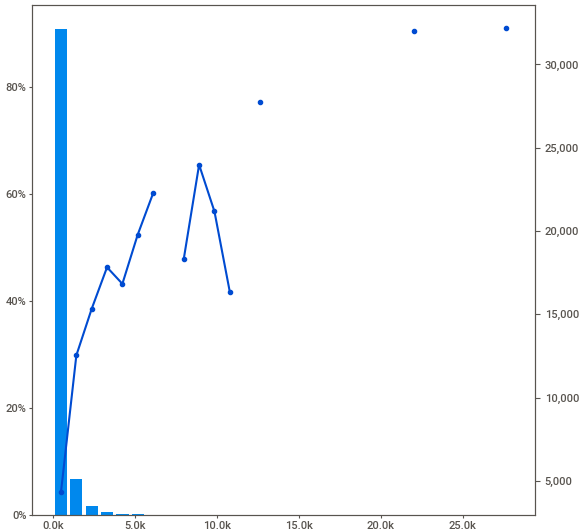
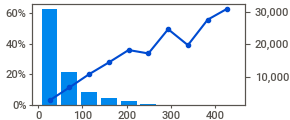
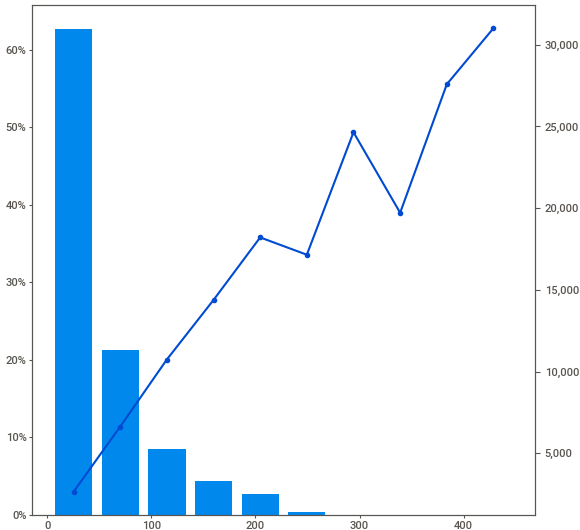
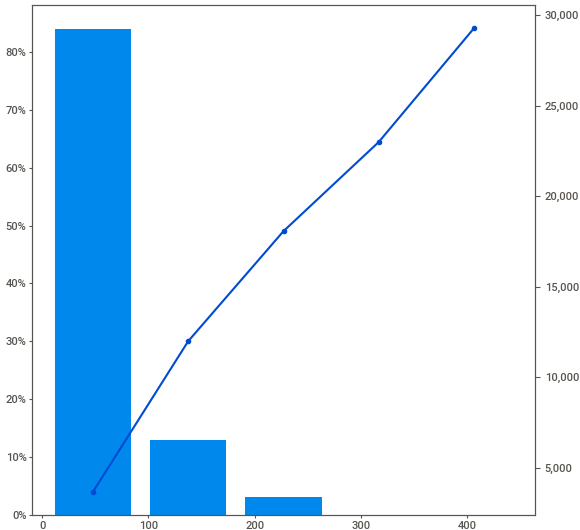
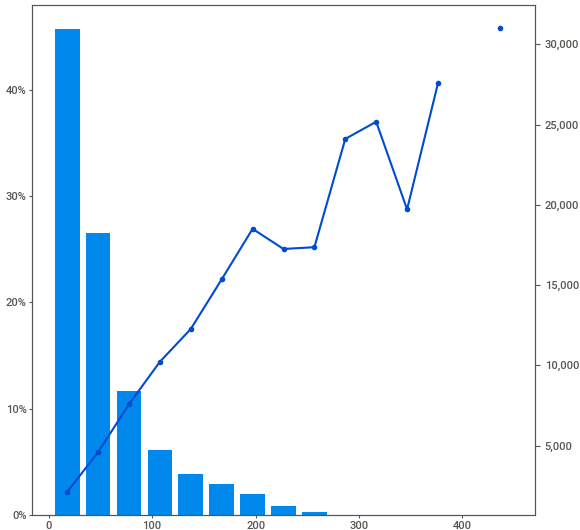
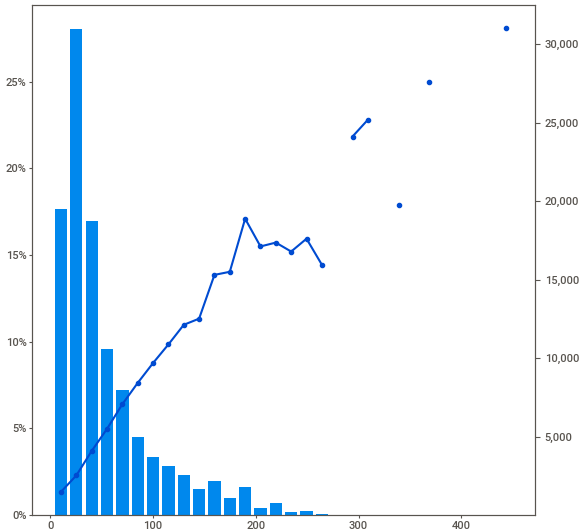
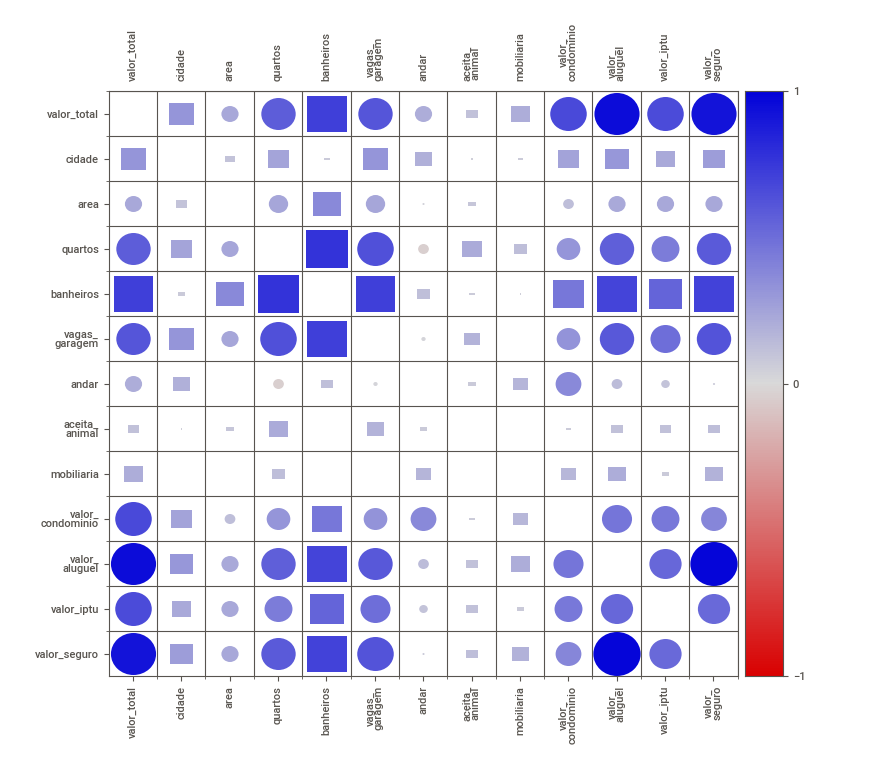
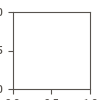

In [ ]:
eda.show_notebook()

In [ ]:
dados = df[['area', 'valor_total']]

In [ ]:
dados

,cidade,area,vagas_garagem,valor_total
0,São Paulo,70,1,5618
1,São Paulo,320,0,7973
2,Porto Alegre,80,1,3841
3,Porto Alegre,51,0,1421
4,São Paulo,25,0,836
...,...,...,...,...
10680,Porto Alegre,63,1,1926
10681,São Paulo,285,4,19260
10682,Rio de Janeiro,70,0,7390
10683,Rio de Janeiro,120,2,14020


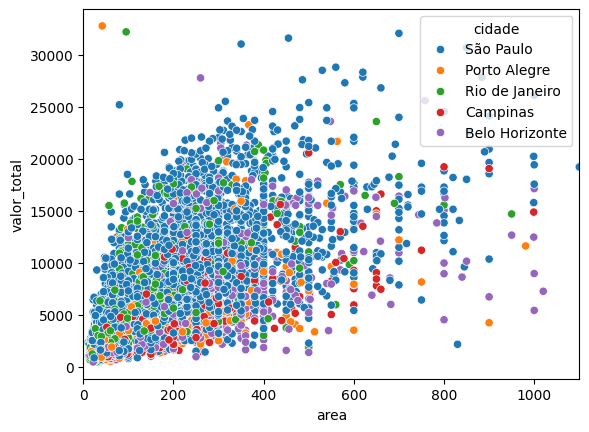

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x = 'area', y = 'valor_total', hue = 'cidade', data = dados);
plt.xlim(0,1100)
plt.savefig("grafico_alta_resolucao.png", dpi=300)
plt.show()

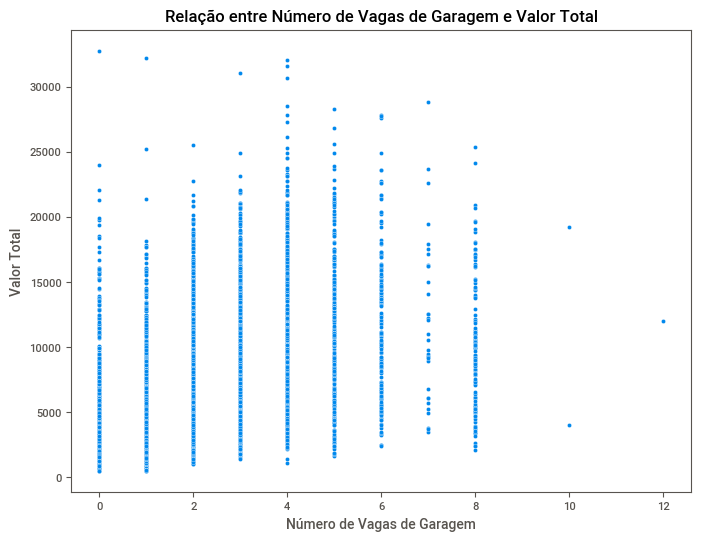

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='vagas_garagem', y='valor_total', data=df)
plt.xlabel("Número de Vagas de Garagem")
plt.ylabel("Valor Total")
plt.title("Relação entre Número de Vagas de Garagem e Valor Total")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Modelo para prever a variável CHARGES a partir da BMI

x = dados[['area']]
y = dados['valor_total']
# Precisamos converter a variável categórica 'cidade' em variáveis dummy
#x = pd.get_dummies(x, columns=['cidade'], drop_first=True)

regressao = LinearRegression()
regressao.fit(x, y) #treinamento do modelo

LinearRegression()

In [ ]:
x

,area
0,70
1,320
2,80
3,51
4,25
...,...
10680,63
10681,285
10682,70
10683,120


In [ ]:
y

0         5618
1         7973
2         3841
3         1421
4          836
         ...  
10680     1926
10681    19260
10682     7390
10683    14020
10684     1587
Name: valor_total, Length: 10685, dtype: int64

In [ ]:
import numpy as np

# Coeficientes da regressão linear
intercepto = regressao.intercept_
coeficiente = regressao.coef_[0]

print(intercepto)
print(coeficiente)

4964.282991215765
1.5678248575097342


In [ ]:
# Calcula os valores previstos para o valor do aluguel

y_previsto = intercepto + (coeficiente*x)

In [ ]:
y_previsto

,area
0,5074.030731
1,5465.986946
2,5089.708980
3,5044.242059
4,5003.478613
...,...
10680,5063.055957
10681,5411.113076
10682,5074.030731
10683,5152.421974


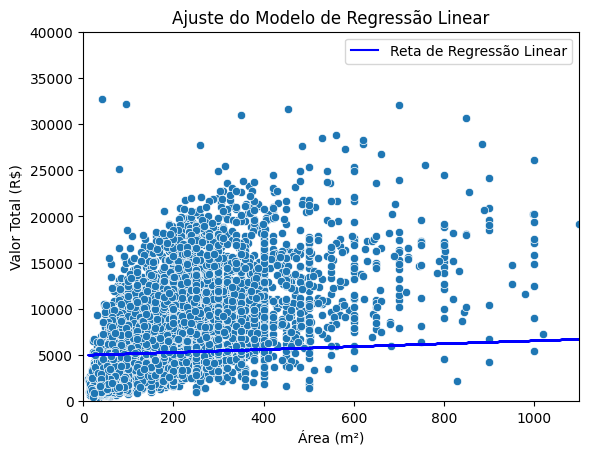

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersão dos dados
sns.scatterplot(x="area", y="valor_total", data=dados)

# Plot da reta de regressão linear
plt.plot(x, y_previsto, color='blue', label='Reta de Regressão Linear')

# Título e rótulos dos eixos
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('Área (m²)')
plt.ylabel('Valor Total (R$)')

# Mostrar a legenda
plt.legend()

# Exibir o gráfico
plt.xlim(0, 1100)
plt.ylim(0, 40000)
plt.show()



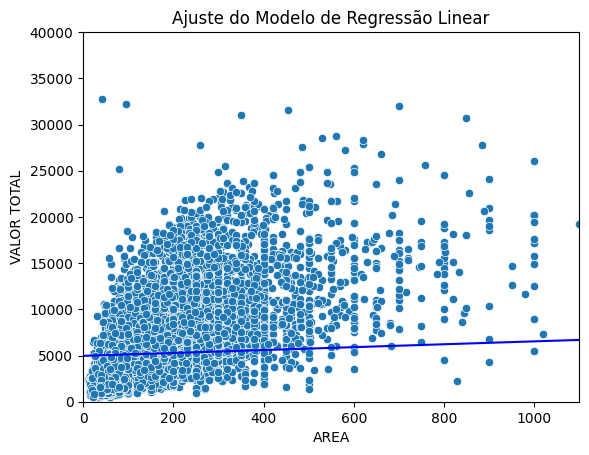

In [ ]:

import numpy as np
pontos_em_x = np.arange(0, 1100, 1)
pontos_em_y = intercepto + coeficiente * pontos_em_x

sns.scatterplot(x = "area", y = 'valor_total', data = dados)

import matplotlib.pyplot as plt
plt.plot(pontos_em_x, pontos_em_y, color = 'blue')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('AREA')
plt.ylabel('VALOR TOTAL')
plt.xlim(0, 1100)
plt.ylim(0, 40000)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
preditos = regressao.predict(x)
eqm = mean_squared_error(y, preditos)

print('EQM da Regressão Linear: {}'.format(round(eqm, 2)))

EQM da Regressão Linear: 19300035.16


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(x, y, test_size = 0.25)

[      area
 4096    43
 7575   150
 1440   298
 7874    48
 3812    81
 ...    ...
 94      64
 1336    52
 8418   109
 2475    50
 9496    55
 
 [8013 rows x 1 columns],
        area
 89       85
 6413    300
 1398     20
 6598    444
 6047    120
 ...     ...
 7392     40
 3456     70
 10492   240
 2246    276
 4413     33
 
 [2672 rows x 1 columns],
 4096    3112
 7575    6491
 1440    9505
 7874    1601
 3812    2276
         ... 
 94      3316
 1336    2139
 8418    6818
 2475     831
 9496    3324
 Name: valor_total, Length: 8013, dtype: int64,
 89        4628
 6413      4497
 1398      2555
 6598     10740
 6047      2414
          ...  
 7392      1214
 3456      1047
 10492     2563
 2246     11830
 4413      2286
 Name: valor_total, Length: 2672, dtype: int64]

In [ ]:
# Separe os dados em teste e treinamento
Xtreino, Xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.25)

# Ajuste do modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)

# Utilize o modelo ajustado para predizer os dados de TESTE
preditos = regressao.predict(Xteste)

# Calcule o Erro Quadrático Médio nos dados de TESTE
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 534672313.39


In [ ]:
dados = df[['area', 'mobiliaria' ,'valor_total']]

In [ ]:
from sklearn.linear_model import LinearRegression

# Modelo para prever a variável CHARGES a partir da BMI

x = dados[['area','mobiliaria']]
y = dados['valor_total']
# Precisamos converter a variável categórica 'cidade' em variáveis dummy
#x = pd.get_dummies(x, columns=['cidade'], drop_first=True)

regressao = LinearRegression()
regressao.fit(x, y) #treinamento do modelo

LinearRegression()

In [ ]:
x

,area,mobiliaria
0,70,1
1,320,0
2,80,0
3,51,0
4,25,0
...,...,...
10680,63,1
10681,285,0
10682,70,1
10683,120,1


In [ ]:
import numpy as np

# Coeficientes da regressão linear
intercepto = regressao.intercept_
coeficiente = regressao.coef_[0]

print(intercepto)
print(coeficiente)

4559.805804854834
1.5568552502954272
